# Week 11 - Combining Models

Learning contents:
- Base Classifier
    - Train a Least Squares classifier, perform a prediction on the samples, and compute the accuracy
    - Plot the decision boundary for least squares classifier
- Committees
    - Split the training data into M=9 equally sized, non-overlapping parts
    - Train M=9 Least Squares classifiers, one for each data split
    - Perform predictions on the whole dataset using a comitteee of classifiers and compute the accuracy
    - Plot the decision boundary for committee classifier
- Decision tree
    - Fit a DecisionTreeClassifier using scikit-learn, perform a prediction on the data, and compute the accuracy
    - Plot the decision boundary for the DecisionTreeClassifier
- AdaBoost
    - Create an AdaBoost classifier of DecisionTreeClassifiers using the scikit-learn library
    - Plot the decision boundary for the AdaBoostClassifier


In [1]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(); sns.set_palette('bright')

In [2]:
# Some plotting functions, we'll be using later


def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
def plot_mesh(X, pred_fn, n_class=2):
    plt_margin = 5
    x_min, x_max = min(X[:,0]) - plt_margin, max(X[:,0]) + plt_margin
    y_min, y_max = min(X[:,1]) - plt_margin, max(X[:,1]) + plt_margin
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))

# Dataset
We'll be working with a slightly modified version of the digits data

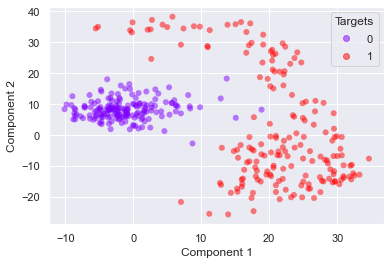

In [3]:
digits = load_digits(n_class=2)

# Get a 2D version of the data using PCA
pca = PCA(n_components=2)
t = digits.target
X = pca.fit_transform(digits.data)

# In order to get a non-linearly seperable case, 
# we'll modify the data a bit this time, 
# translating the '-1' class to the right and up
X = np.where(
    np.repeat(np.expand_dims(t == 1, axis=1), 2, axis=1), 
    X, 
    np.vstack([X[:,0]+20, X[:,1]+10]).T
)

N = len(t) # total number of samples

plot_scatter(X, t)

# 0) Base Classifier

## 0.1) Train a Least Squares classifier, perform a prediction on the samples, and compute the accuracy
You should have the solution for this from the exercise "Week 7 - Linear classification".

## 0.2) Plot the decision boundary for least squares classifier

# 1) Committees

## 1.1) Split the training data into M=9 equally sized, non-overlapping parts

In [4]:
M = 9


## 1.2) Train M=9 Least Squares classifiers, one for each data split

## 1.3) Perform a prediction on the whole dataset using comitteee of classifiers and compute the accuracy

## 1.4 Plot the decision boundary for committee classifier

# 2) Tree

## 2.1) Fit a DecisionTreeClassifier using `scikit-learn`, perform a prediction on the data, and compute the accuracy
Use `max_depth=3`

## 2.2) Plot the decision boundary for the DecisionTreeClassifier

# 3) AdaBoost

## 3.1) Create an AdaBoost classifier of DecisionTreeClassifiers using the `scikit-learn` library
Use a depth of 1 for the `DecisionTreeClassifier` and 7 estimators for the `AdaBoostClassifier`. Use the defaults for the other parameters

## 3.2) Plot the decision boundary for the AdaBoostClassifier